In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data= pd.read_csv('/content/drive/MyDrive/Moldex internship/MPC15.csv')
data.sample(10)

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
226,62,1,1,120,281,0,0,103,0,1.4,1,1,3,0
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2,1
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
224,54,1,0,110,239,0,1,126,1,2.8,1,1,3,0
30,41,0,1,105,198,0,1,168,0,0.0,2,1,2,1
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2,1
103,42,1,2,120,240,1,1,194,0,0.8,0,0,3,1
100,42,1,3,148,244,0,0,178,0,0.8,2,2,2,1


In [3]:
data.shape

(303, 14)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   sex                  303 non-null    int64  
 2   chest_pain_type      303 non-null    int64  
 3   resting_bp           303 non-null    int64  
 4   cholestoral          303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   restecg              303 non-null    int64  
 7   max_hr               303 non-null    int64  
 8   exang                303 non-null    int64  
 9   oldpeak              303 non-null    float64
 10  slope                303 non-null    int64  
 11  num_major_vessels    303 non-null    int64  
 12  thal                 303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [27]:
data.describe()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


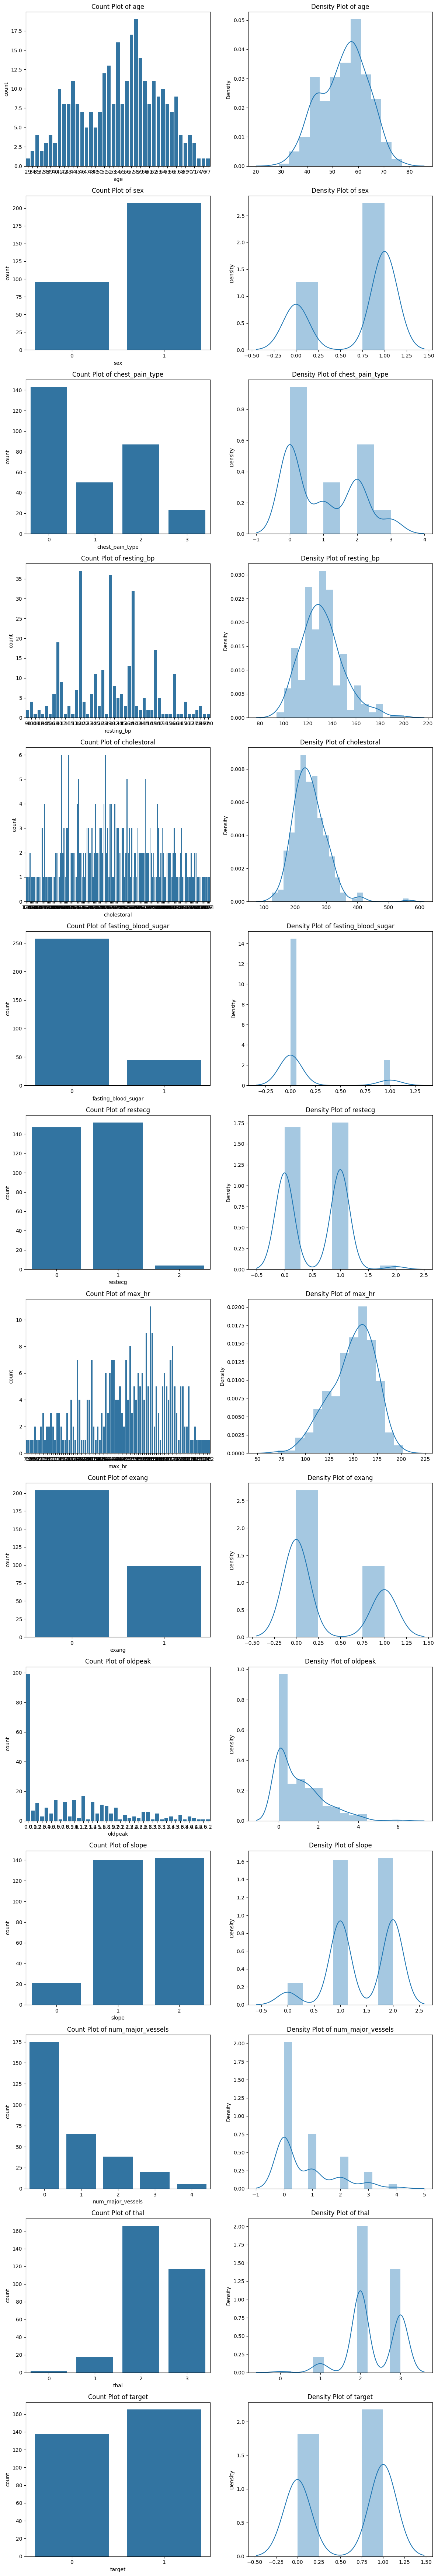

In [11]:
df = pd.DataFrame(data)

num_columns = len(df.columns)

# Set the figure size
plt.figure(figsize=(12, num_columns * 5))

# Loop through each column and create plots
for idx, column in enumerate(df.columns):
    # Position for the count plot
    plt.subplot(num_columns, 2, idx * 2 + 1)
    sns.countplot(data=df, x=column)
    plt.title(f'Count Plot of {column}')

    # Position for the density plot
    plt.subplot(num_columns, 2, idx * 2 + 2)
    if df[column].dtype in ['int64', 'float64']:
        sns.distplot(x=data[column])
        plt.title(f'Density Plot of {column}')
    else:
        plt.axis('off')  # Hide the subplot if the column is not numerical

# Adjust layout
plt.tight_layout()
plt.show()

***
#Splitting the data
***

In [12]:
x= data.drop('target', axis=1)
y= data['target']
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

***
#Logistic Regression
***

In [21]:
lr= LogisticRegression()
lr.fit(x_train,y_train)
y_red=lr.predict(x_test)
print('Accuracy Score: ', accuracy_score(y_test,y_red))
print('\nConfusion matrix: \n')
print(confusion_matrix(y_test,y_red))
print('\nClassification Report: \n')
print(classification_report(y_test,y_red))

Accuracy Score:  0.8852459016393442

Confusion matrix: 

[[25  4]
 [ 3 29]]

Classification Report: 

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



***
#K- Nearest neighbour
***

In [23]:
knn= KNeighborsClassifier()
knn.fit(x_train,y_train)
y_red=knn.predict(x_test)
print('Accuracy Score: ', accuracy_score(y_test,y_red))
print('\nConfusion matrix: \n')
print(confusion_matrix(y_test,y_red))
print('\nClassification Report: \n')
print(classification_report(y_test,y_red))

Accuracy Score:  0.6885245901639344

Confusion matrix: 

[[18 11]
 [ 8 24]]

Classification Report: 

              precision    recall  f1-score   support

           0       0.69      0.62      0.65        29
           1       0.69      0.75      0.72        32

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



***
#Decison Tree
***

In [24]:
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_red=dt.predict(x_test)
print('Accuracy Score: ', accuracy_score(y_test,y_red))
print('\nConfusion matrix: \n')
print(confusion_matrix(y_test,y_red))
print('\nClassification Report: \n')
print(classification_report(y_test,y_red))

Accuracy Score:  0.8524590163934426

Confusion matrix: 

[[27  2]
 [ 7 25]]

Classification Report: 

              precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.93      0.78      0.85        32

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



***
#Random Forest
***

In [25]:
rf= RandomForestClassifier()
rf.fit(x_train,y_train)
y_red=rf.predict(x_test)
print('Accuracy Score: ', accuracy_score(y_test,y_red))
print('\nConfusion matrix: \n')
print(confusion_matrix(y_test,y_red))
print('\nClassification Report: \n')
print(classification_report(y_test,y_red))

Accuracy Score:  0.8524590163934426

Confusion matrix: 

[[25  4]
 [ 5 27]]

Classification Report: 

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



***
#Result:

* As we can clearly see that the Logistic regression is giving best result we also increase the performance by tunning the model.

***